# Домашнее задание №2
## Датасет: heart.csv

### Автор: Юматов Владимир Константинович

#### группа 19.Б11-мм

# Задание

- [x] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- [x] Взять данные для предсказания заболеваний сердца (целевой признак для предсказания --- target).
- [x] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
- [x] Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
- [x] Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- [x] Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).
- [x] Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
- [x] Реализовать еще один из методов классификации и добавить его в сравнение.
- [x] (см. файл classificationDiabetes) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, StratifiedKFold
from math import inf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier

# Основной датасет

[Датасет](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) -  информация о пациентах, содержит следующие сведения:

* age: возраст пациента
* sex: пол пациента (1-мужчина, 0-женщина)
* cp: тип боли в груди (4 типа)
* trestbps: артериальное давление при попадании в больницу
* chol: холестерин в мг
* fbs: сахар в крови выше 120 мг
* restecg: результаты электрокардиографии в покое (значения 1, 2, 3)
* thalach: высшее показание пульса
* exang: стенокардия, вызванная физической нагрузкой
* oldpeak: депрессия ST-сегмента, вызванная физической нагрузкой, по сравнению с состоянием покоя
* slope: наклон пикового сегмента ST при нагрузке
* ca: количество крупных сосудов (0-3), окрашенных при флюороскопии
* thal: 0 = нормальный; 1 = фиксированный дефект; 2 = обратимый дефект

Целевая переменная:

* target - have disease or not (1=yes, 0=no)

## Первичный анализ, очистка и подготовка данных 

In [6]:
df = pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Из таблицы видно, что интересующая нас часть данных на первый взгляд целая и не имеет пропусков

In [8]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Для начала, обратим внимание, что при описании датасета явно [указали](https://archive.ics.uci.edu/ml/datasets/heart+disease), что должно быть 4 категории у этого атрибута: 0-3. В дискуссиях об этом датасете на [kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/discussion/307455) отмечено, что эти данные могут быть неверны.

In [9]:
df.drop(df[(df['ca'] == 4)].index, inplace=True)

Проблемы с данными также можно отметить и для атрибута **thal**: в обоих описаниях данных утверждается, что у атрибута должно быть три значения (3,6,7 или 0,1,2. У нас данные с kaggle, поэтому считаем верными второй вариант). При этом, если почистить данные как с предыдущим признаком, придется убирать все строки со значением 3, а это значительная часть датасета. Возможно, в описании все-таки есть ошибка и ошибочные данные это вариант 1. К сожалению, определить это достаточно сложно, поэтому избавимся от этого признака совсем.

In [10]:
df = df.drop(columns = "thal")

Отлично, данные почищены. Теперь посмотрим на статистику по целевому признаку.

In [11]:
df['target'].value_counts()

1    511
0    496
Name: target, dtype: int64

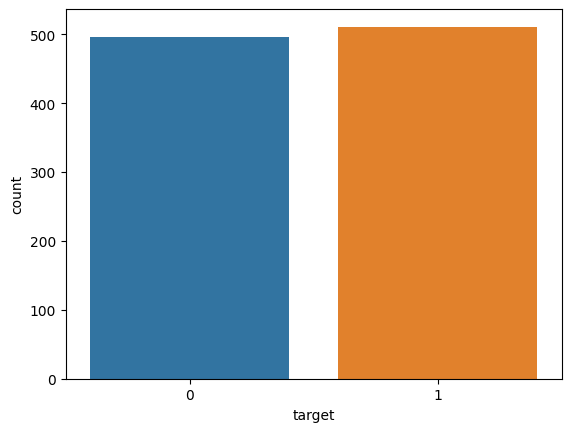

In [12]:
sns.countplot(x = 'target', data=df);

In [13]:
df['target'].mean()

0.5074478649453823

Нетрудно заметить, что количество людей с заболеваниями сердца и без заболеваний в этом датасете очень близко друг к другу(51% пациентов имел заболевание). Посмотрим на зависимость целевого признака от нецелевых

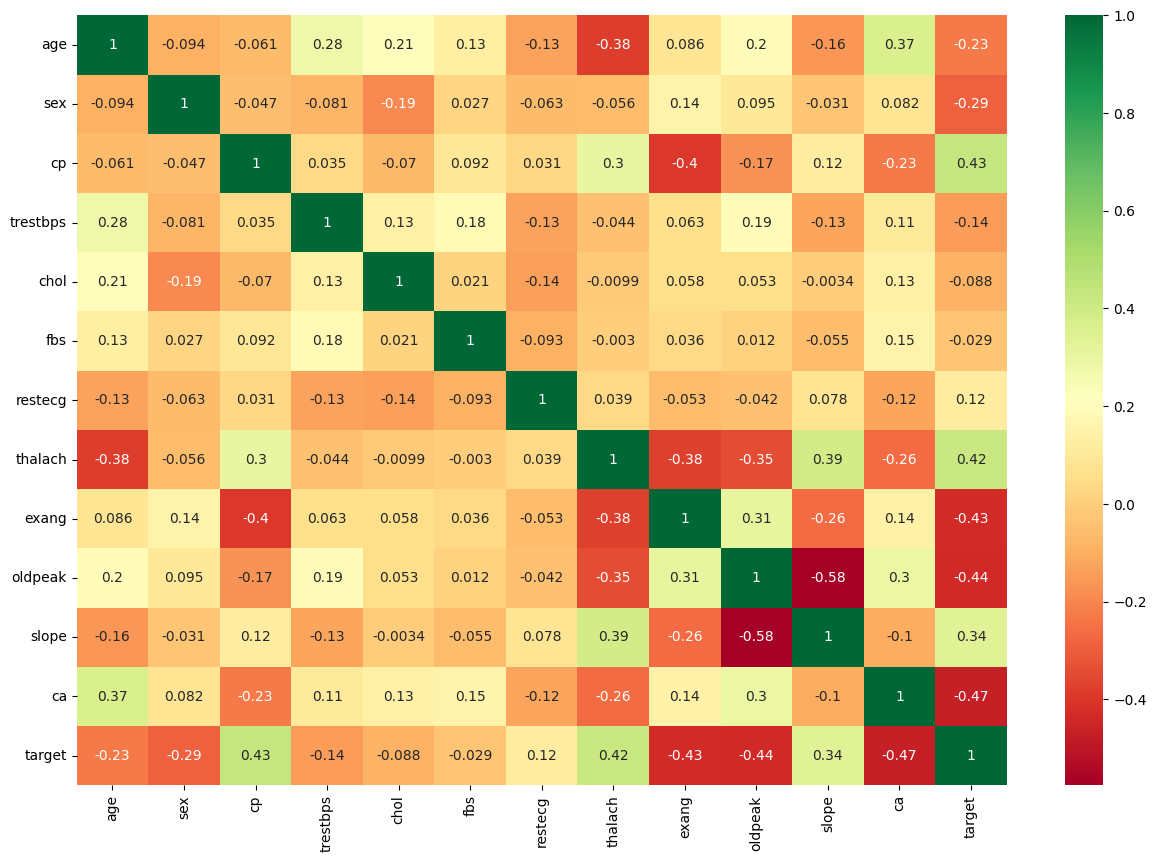

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

Сначала посмотрим на корреляцию между количественными признаками. Сильной корреляции между признаками нет, можно обратить внимание на **slope** и **oldpeak**

### Количественный признак **age**

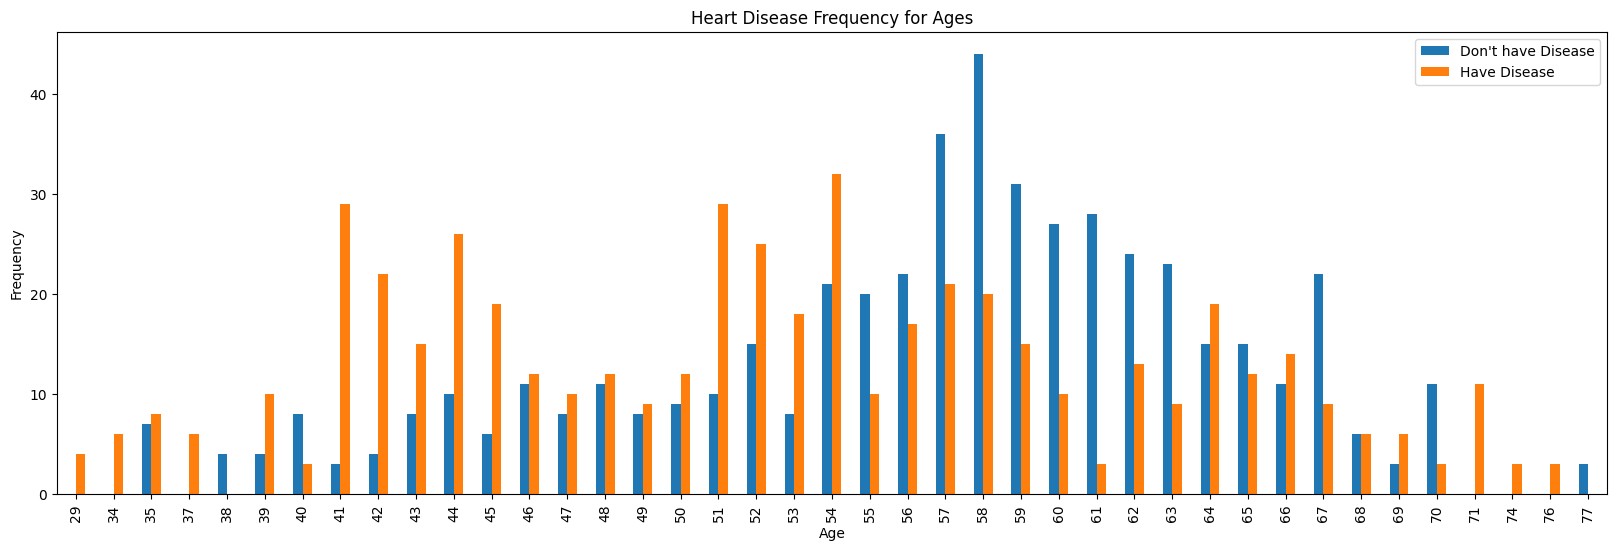

In [15]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Don't have Disease", "Have Disease"])
plt.show()

Во-первых, стоит отметить, что есть два диапазона возраста, в рамках которых присутствуют пациенты только с проблемами с сердцем: 29-34 года и 71-76. Но количество данных в обоих диапазонах достаточно мало, основные показатели сосредоточились в возрасте 41-67.

Также можно сделать вывод, что если пациент находится в возрастном диапазоне от 41 до 54, то с больщой вероятностью у него будут проблемы с сердцем, в то время как пациенты старше 55 лет имеют больший шанс не получить диагноз.

### Категориальный признак **Sex**

In [16]:
df.groupby(['sex', 'target'])['target'].count()

sex  target
0    0          86
     1         226
1    0         410
     1         285
Name: target, dtype: int64

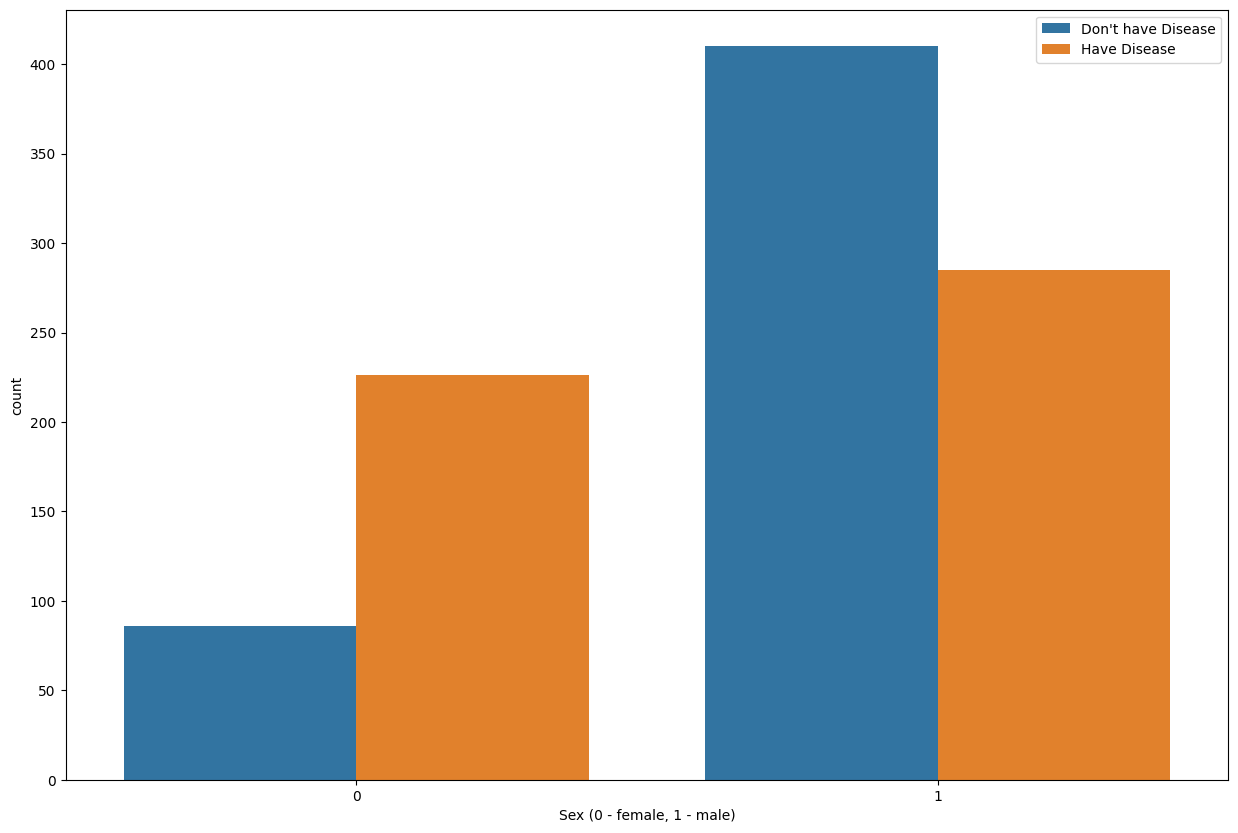

In [17]:
sns.countplot(x='sex',hue='target',data=df);
plt.legend(["Don't have Disease", "Have Disease"]);
plt.xlabel("Sex (0 - female, 1 - male)");
fig = plt.gcf()
fig.set_size_inches(15,10)

У женщин выше риск получения диагноза о сердечном заболевании: 72% против 41% у мужчин, несмотря на то, что мужчины чаще обращаются для обследования (312 обращений у женщин vs 713 у мужчин)695

### Категориальный признак **cp** (боль в груди)

In [18]:
df['cp'].value_counts()

0    494
2    273
1    163
3     77
Name: cp, dtype: int64

In [19]:
pd.crosstab(df['cp'], df['target']).style.background_gradient()

target,0,1
cp,,
0,372,122
1,33,130
2,65,208
3,26,51


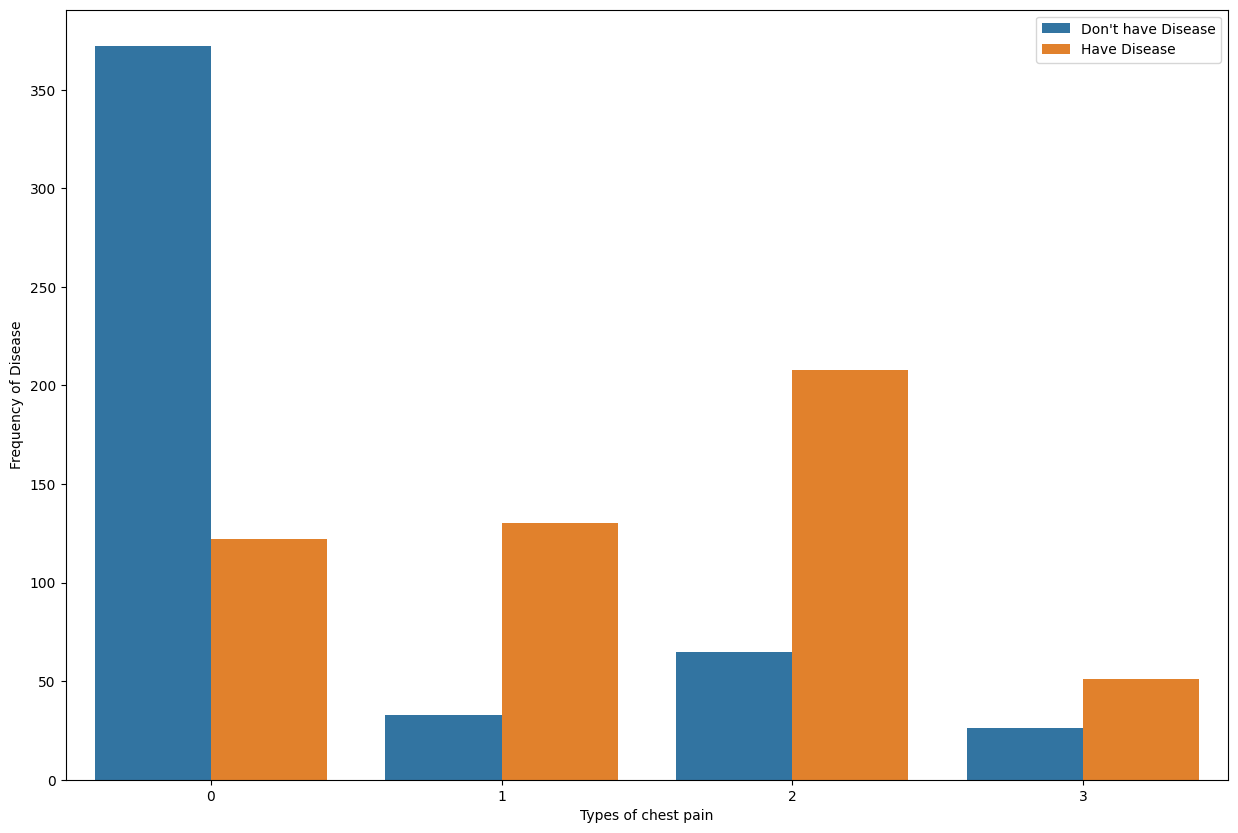

In [20]:
sns.countplot(x='cp',hue='target',data=df);
plt.legend(["Don't have Disease", "Have Disease"]);
plt.xlabel("Types of chest pain")
plt.ylabel("Frequency of Disease")
fig = plt.gcf()
fig.set_size_inches(15,10)

Несмотря на то, что чаще всего у людей боль 1-го типа, процент здоровых людей с такой болью самый большой. У остальных типов (2, 3 и 4) процент заболеваний выше, чем процент отсутствия болезней. Самый сильный показатель - боль 3-го типа. У каждого 4-го пациента с такой болью были обнаружены проблемы с сердцем.

### Категориальные признаки **fbs** и **exang**

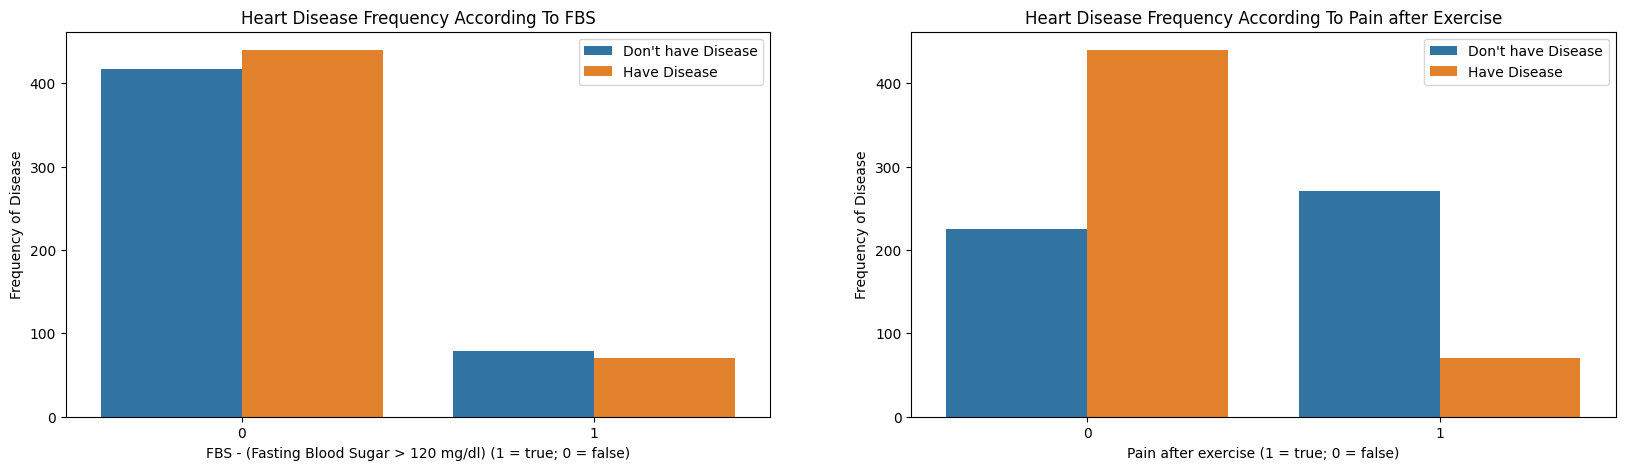

In [21]:
_, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x = 'fbs', hue = 'target', data=df, ax=ax[0])
ax[0].set_title('Heart Disease Frequency According To FBS')
ax[0].set_xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
ax[0].set_ylabel('Frequency of Disease')
ax[0].legend(["Don't have Disease", "Have Disease"]);
sns.countplot(x = 'exang', hue = 'target', data=df, ax=ax[1])
ax[1].set_title('Heart Disease Frequency According To Pain after Exercise')
ax[1].set_xlabel('Pain after exercise (1 = true; 0 = false)')
ax[1].set_ylabel('Frequency of Disease')
ax[1].legend(["Don't have Disease", "Have Disease"]);
plt.show()

Если уровень сахара в крови (натощак) не превышает 120 мг, то риск иметь болезнь выше. И наоборот, если уровень сахара превышает 120 мг, то вероятность болезни сердца ниже, чем вероятность отсутствия болезни.

Если же посмотреть на график о боли, то можно заметить, что количество здоровых людей не так сильно отличается в случае с болью/отсутсвием боли после нагрузки. При этом, если человек не испытывает болевые ощущения после нагрузки на сердце, то вероятность, что у него заболевание сердца, выше, чем отстутвие заболевания и даже наличия заболевания при болевых ощущениях.



### Количественный признак **thalach** и **slope**

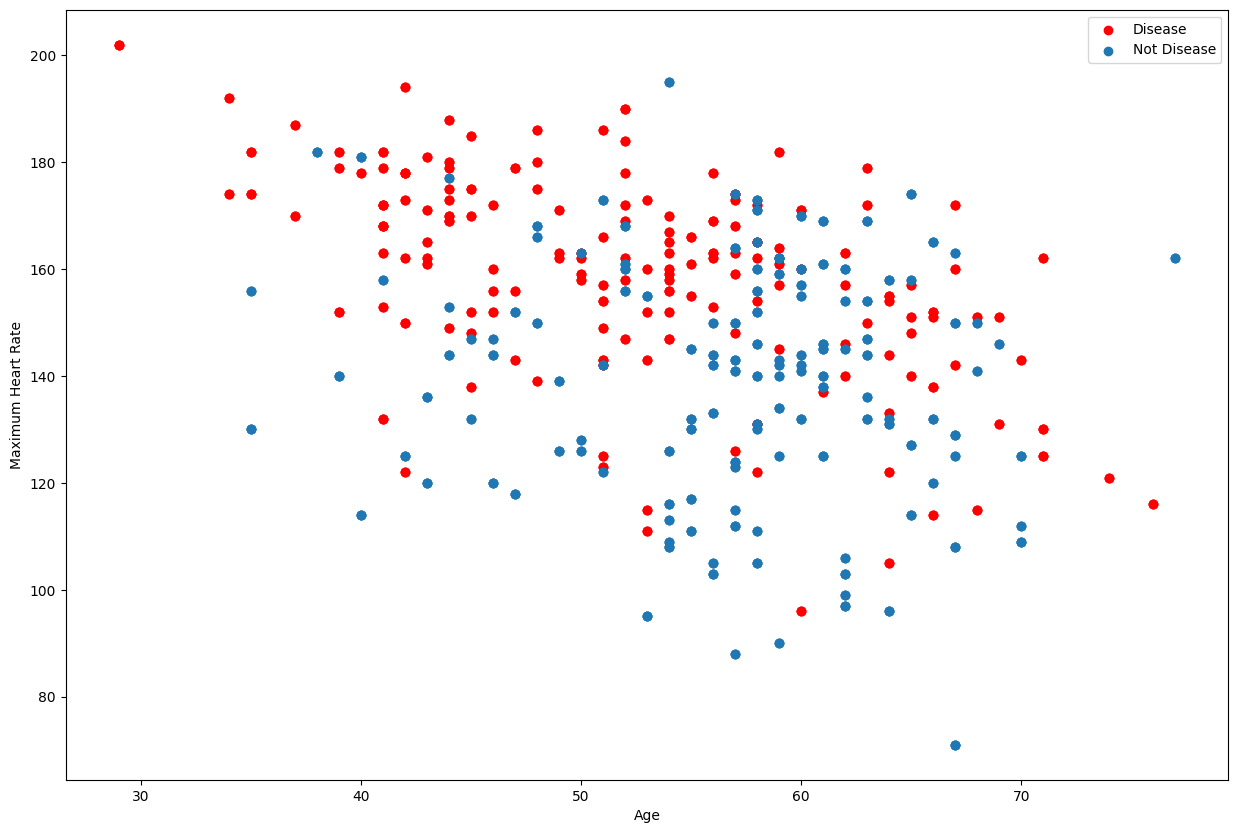

In [22]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

Разобьем график на две части: люди до 50 и после. У первой, более молодой группы людей, высокий пульс чаще являлся признаком заболевания, в то время как у второй группы результаты более смешанные.
Если пациент - человек 30-50 лет, и его пульс выше 160, то вероятность болезни высокая

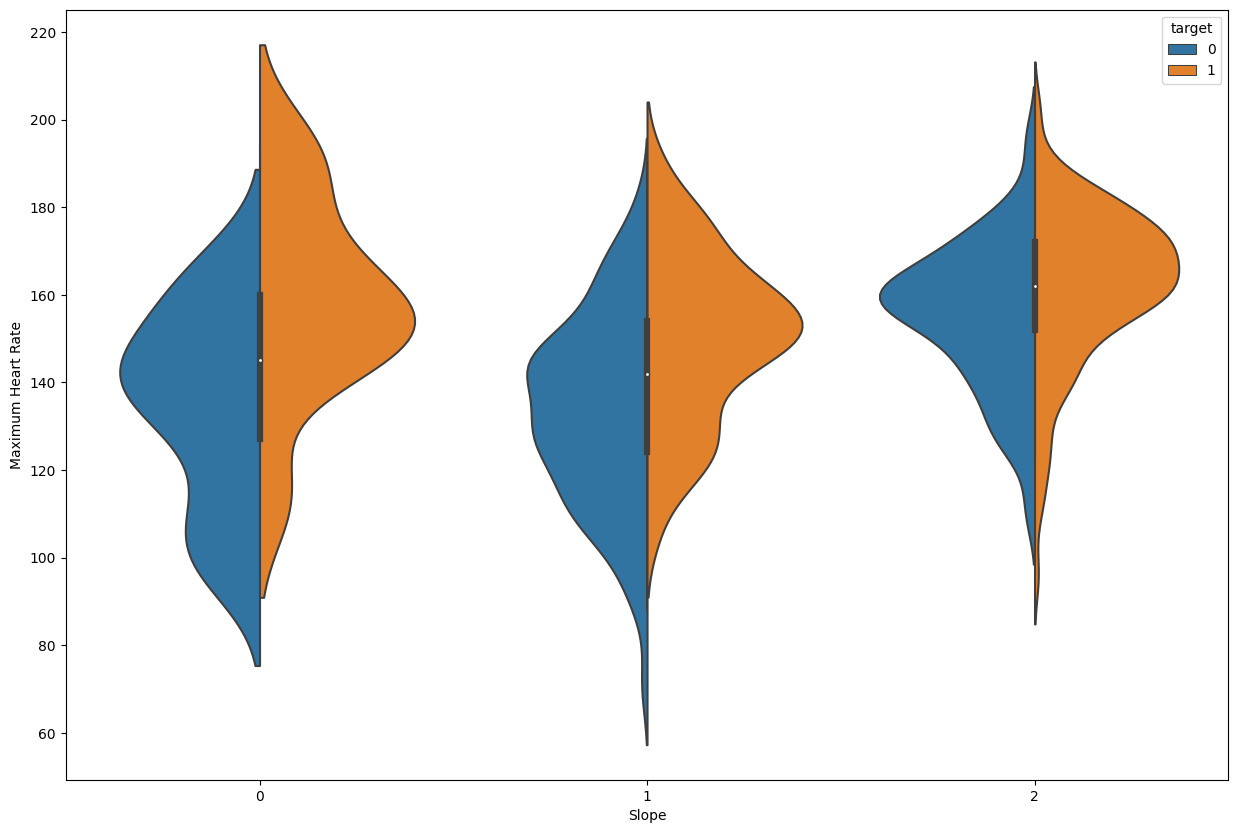

In [23]:
sns.violinplot(x=df.slope, y=df.thalach, hue = df.target, data=df, split=True);
plt.xlabel("Slope")

plt.ylabel("Maximum Heart Rate")
fig = plt.gcf()
fig.set_size_inches(15,10)

Если у пациента наблюдается частое сердцебиение (больше 180) при минимальной наклоне ST-сегмента, у него есть заболевание сердца. Для 1 и 2 уровня наклона результаты чуть лучше, и также можно увидеть, что если на 1 уровне у пациента не ускоренный пульс, то скорее всего болезни нет.

### Признаки **trestbps**, **oldpeak** и **chol**

In [24]:
pd.crosstab(df['target'], df['chol']).style.background_gradient()

chol,126,131,141,149,157,160,164,166,167,168,169,172,174,175,176,177,178,180,182,183,184,185,186,187,188,192,193,195,196,197,198,199,200,201,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,239,240,241,242,243,244,245,246,247,248,249,250,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,273,274,275,276,277,278,281,282,283,284,286,288,289,290,293,294,295,298,299,300,302,303,304,305,306,307,308,309,311,313,315,318,319,321,322,325,326,327,330,335,340,341,342,353,354,360,394,407,409,417,564
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,3,0,4,0,0,3,4,4,0,4,3,4,0,3,8,0,0,0,0,3,3,0,4,7,0,3,0,0,6,4,0,3,0,8,8,4,8,4,0,0,0,0,15,0,0,0,3,4,8,4,0,0,0,4,4,8,0,0,4,12,11,7,4,3,8,0,3,4,7,0,3,0,7,3,0,7,0,3,11,0,0,3,14,3,8,0,6,3,4,4,0,4,3,0,3,3,4,7,3,0,3,9,4,4,0,0,4,14,7,4,8,8,8,3,4,3,0,3,7,4,0,0,3,3,0,4,0,7,4,0,4,4,4,0,4,0,3,4,8,8,0,4,0,4,0,0,0,4,3,0,0
1,3,0,3,4,4,3,0,0,0,3,0,0,0,3,0,6,3,4,3,4,0,0,4,0,0,7,3,3,6,13,3,9,0,9,4,13,3,0,3,6,7,3,13,3,6,6,3,3,0,0,6,8,7,7,3,0,0,13,8,4,0,0,3,3,9,13,6,6,0,6,14,0,3,6,6,9,3,3,3,0,9,3,4,3,3,3,3,4,0,3,3,3,6,3,7,3,3,3,9,3,6,3,0,3,0,6,4,0,0,3,0,0,3,0,0,0,3,6,3,0,0,6,9,3,0,3,0,6,4,0,3,3,3,0,3,0,6,0,0,0,0,3,0,4,0,3,3,3,0,0,3,3


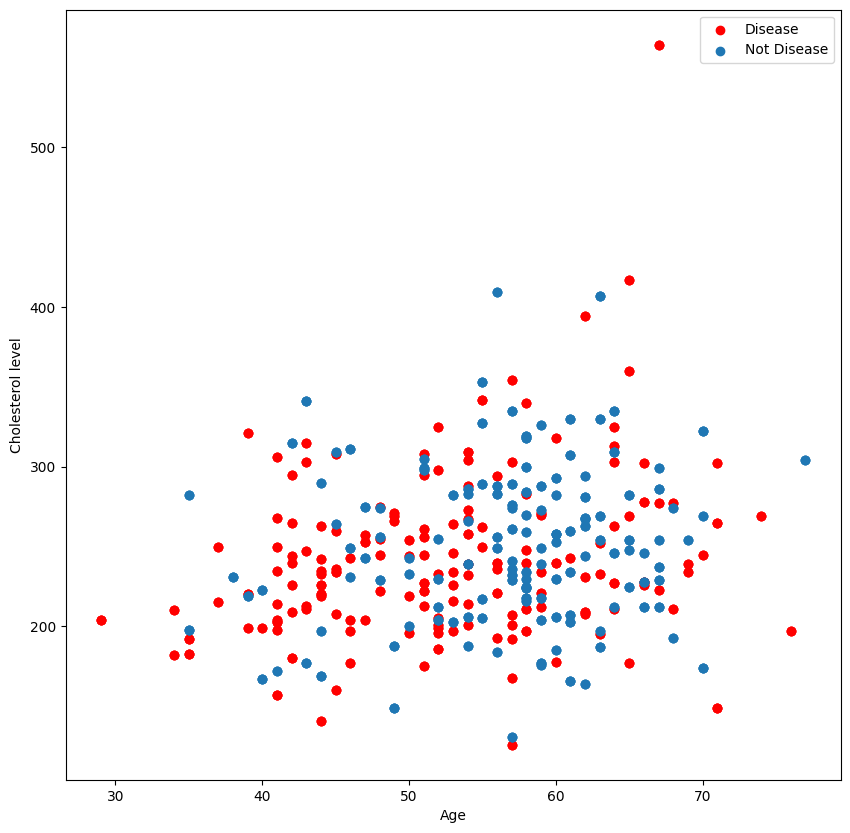

In [25]:
plt.scatter(x=df.age[df.target==1], y=df.chol[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.chol[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.ylabel("Cholesterol level")
plt.show()

На графике видно, что у большинства  пациентов, у которых холестерин выше 200 присутствуют проблемы с сердцем (особенно это заметно в возрасте от 35 дло 55 лет).


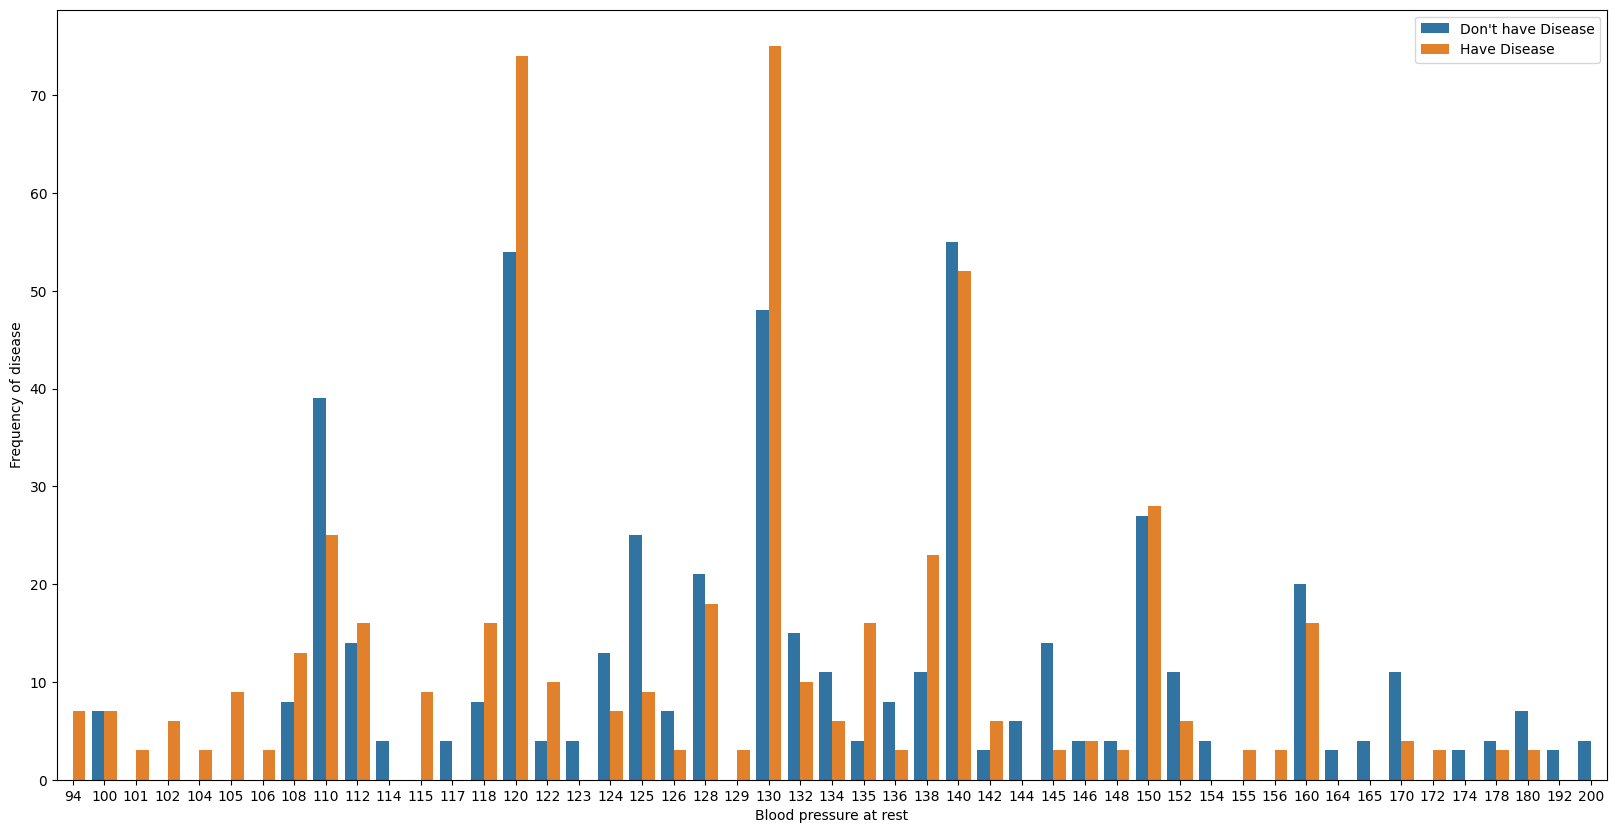

In [26]:
sns.countplot(x = 'trestbps', hue = 'target', data=df)
plt.legend(["Don't have Disease", "Have Disease"]);
plt.xlabel("Blood pressure at rest")
plt.ylabel("Frequency of disease")
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

Не очень показательный график, можно отметить пики заболевших (артериальное давление 120 и 130).
Посмотрим на график артериального давления и возраста.

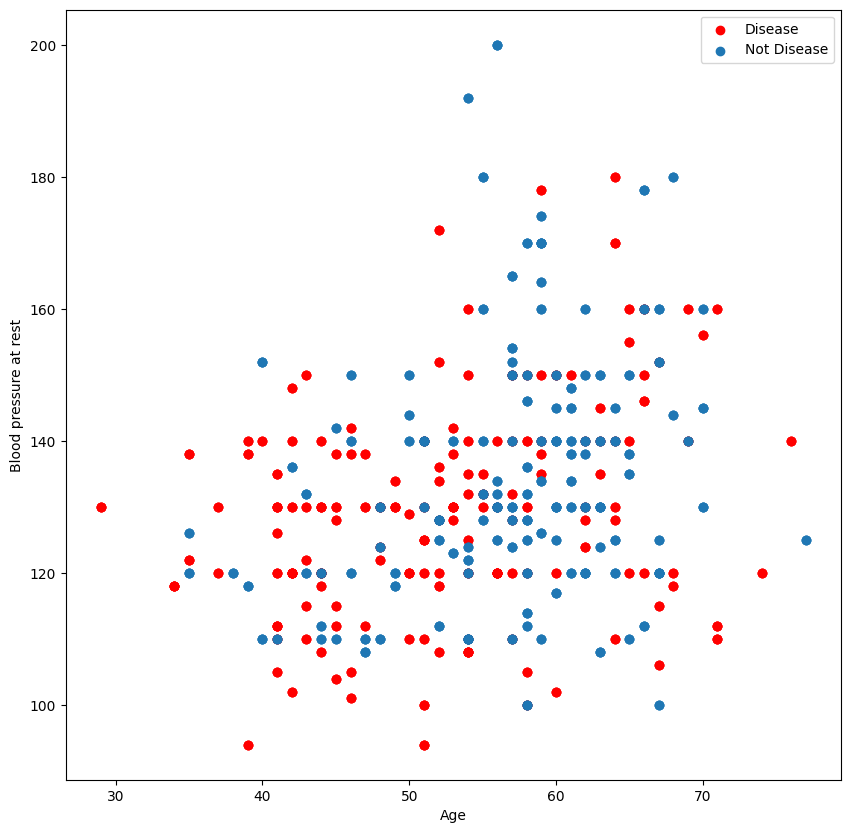

In [27]:
plt.scatter(x=df.age[df.target==1], y=df.trestbps[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.trestbps[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.ylabel("Blood pressure at rest")
plt.show()

Можно заметить, что у людей в возрасте 30-50 на графике в среднем больше заболеваний, особенно при давлении выше 120 (и ниже 105). То есть у молодых людей с повышенным давлением выше шансы иметь проблемы с сердцем.

In [28]:
df.groupby(['oldpeak', 'target'])['target'].count()

oldpeak  target
0.0      0          87
         1         231
0.1      0           8
         1          12
0.2      0          10
                  ... 
4.2      0           3
         1           3
4.4      0           4
5.6      0           4
6.2      0           3
Name: target, Length: 61, dtype: int64

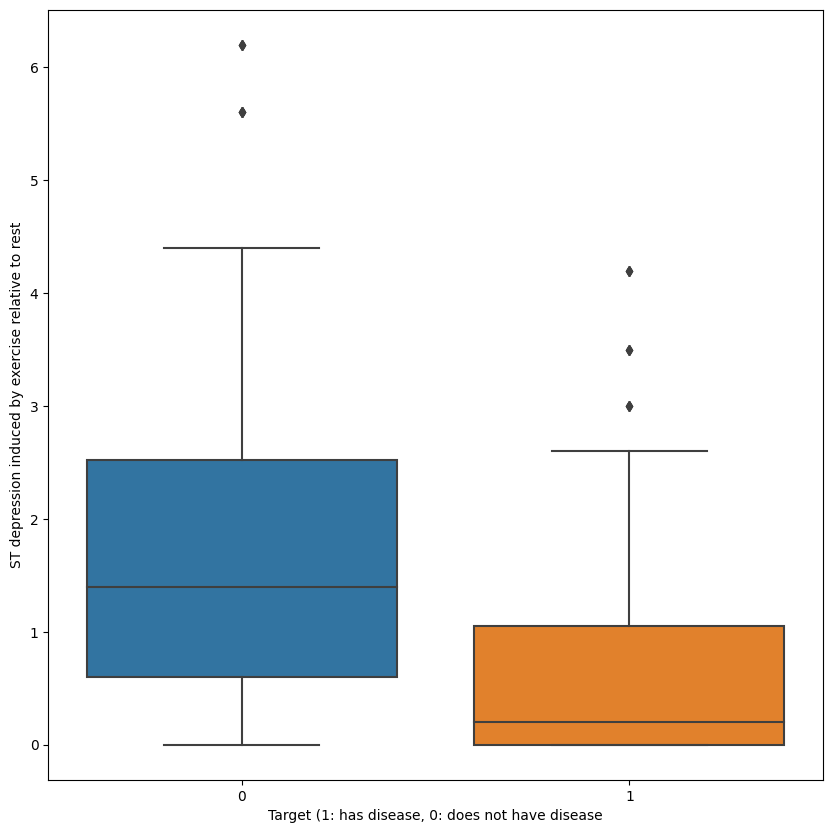

In [29]:
sns.boxplot(x='target',y= 'oldpeak',data=df);
plt.xlabel("Target (1: has disease, 0: does not have disease")
plt.ylabel("ST depression induced by exercise relative to rest")
fig = plt.gcf()
fig.set_size_inches(10,10)

Среднее значение депрессии ST-сегмента у пациентов без болезни сердца - 1.6, в то время как среднее значение у пациентов с диагнозом - 0.58. Есть несколько выбросов с высокими показаниями, но в целом заметно, что у здоровых людей этот показатель выше.

### Категориальные признаки **restecg**, **ca**

In [30]:
pd.crosstab(df['restecg'], df['target']).style.background_gradient()

target,0,1
restecg,,
0,280,214
1,204,294
2,12,3


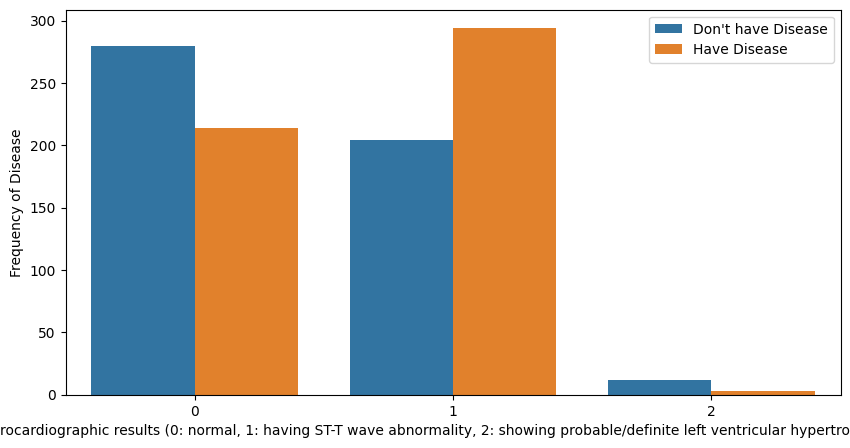

In [31]:
sns.countplot(x='restecg',hue='target',data=df);
plt.legend(["Don't have Disease", "Have Disease"]);
plt.xlabel("Resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality, 2: showing probable/definite left ventricular hypertrophy by Estes' criteria")
plt.ylabel("Frequency of Disease")
fig = plt.gcf()
fig.set_size_inches(10,5)

При 1 и 3 варианте количество пациентов без заболевания превышает количество пациентов с больным сердцем, но при этом, если результат был 2 типа, то с вероятностью 59% у пациента проблемы с сердцем

In [32]:
pd.crosstab(df['ca'], df['target']).style.background_gradient()

target,0,1
ca,,
0,163,415
1,160,66
2,113,21
3,60,9


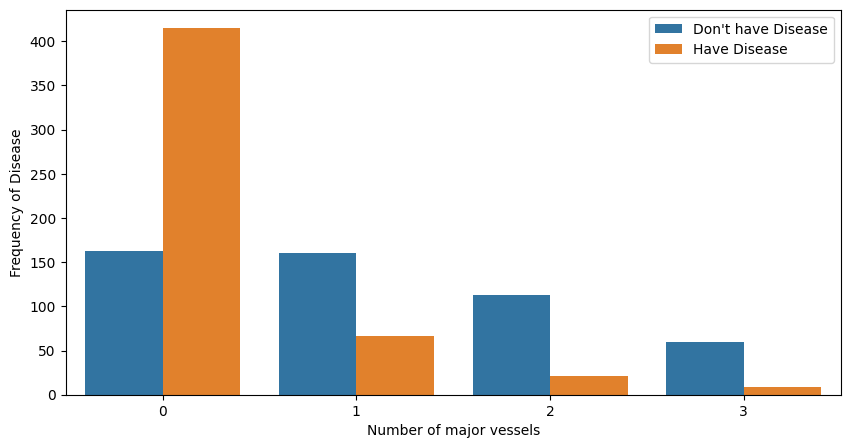

In [33]:
sns.countplot(x='ca',hue='target',data=df);
plt.legend(["Don't have Disease", "Have Disease"]);
plt.xlabel("Number of major vessels")
plt.ylabel("Frequency of Disease")
fig = plt.gcf()
fig.set_size_inches(10,5)

Если у пациента не обнаружено ни одного большого сосуда при флюороскопии, то скорее всего у него болезнь сердца (вероятность 72%)

### Выводы


**age**: у пациентов 41-54 лет вероятность болезни сердца выше, чем у людей 55+;

**sex**: женщины чаще получают диагноз о сердечном заболевании несмотря на то, что мужчины чаще обращаются для обледования;

**cp**: чаще всего у людей обнаруживается грудная боль 1 типа, и процент здоровых людей в этой категории самый высокий. У пациентов с болью 2 типа самая высокая вероятность получить диагноз;

**trestbps**: у молодых людей с повышенным давлением выше шансы иметь проблемы с сердцем;

**chol**: у большинства  пациентов, у которых холестерин выше 200 присутствуют проблемы с сердцем (особенно это заметно в возрасте от 35 дло 55 лет);

**fbs**: если уровень сахара в крови (натощак) не превышает 120 мг, то риск иметь болезнь выше;

**restecg**: если результат был 2 типа, то с вероятностью 59% у пациента проблемы с сердцем;

**thalach**: у людей до 50 лет высокий пульс является признаком заболевания. Если пациент - человек 30-50 лет, и его пульс выше 160, то вероятность болезни высокая;

**exang**: если человек не испытывает болевые ощущения после нагрузки на сердце, то вероятность, что у него заболевание сердца, выше, чем отстутвие заболевания и даже наличия заболевания при болевых ощущениях;

**oldpeak**: у здоровых людей показатель выше (среднее значение здоровых - 1.6, больных - 0.58); 

**slope**: если у пациента наблюдается частое сердцебиение (больше 180) при минимальной наклоне ST-сегмента, у него есть заболевание сердца;

**ca**: если у пациента не обнаружено ни одного большого сосуда при флюороскопии, то скорее всего у него болезнь сердца (вероятность 72%);


Атрибут **thal** был удален из-за расхождения в информации с описанием датасета и затрудненной интерпретации.

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from math import inf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, f_regression, RFECV, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [35]:
accuracies = dict()

y = df["target"]
X = df.drop(columns = "target")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 54)

In [36]:
scaler = StandardScaler()  

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

X_scaled = scaler.transform(X)

## Реализация логистической регрессии

In [37]:
import warnings
import warnings
from scipy.special import softmax
from sklearn.preprocessing import OneHotEncoder


class MyLogReg:
    def __init__(self, learning_rate=0.01, epochs=250, l2=0.01, random_seed=59):
        self.__weights = []
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.random_seed = random_seed
        self.l2 = l2

    def getWeights(self):
        return self.__weights

    def __sigmoid(self, z):
        warnings.filterwarnings('ignore')
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        
        samples, _ = np.shape(X)
        
        features = np.c_[np.ones(samples), X]
        y_encode = OneHotEncoder(sparse=False).fit_transform(y.values.reshape(-1,1))
        np.random.seed(self.random_seed)
        weights = np.random.random_sample((features.shape[1], y_encode.shape[1]))
        

#         for epoch in range(self.epochs):
#             z = X_full @ weights
#             h = self.__sigmoid(z)
#             gradient = (X_full.T @ (h - y)) / y.size
#             weights -= self.learning_rate * gradient
            
        for epoch in range(self.epochs):
            z = features @ weights
            h = softmax(-z, axis=1)
            error = y_encode - h
            gradient = 1 / samples * (features.T @ error) + 2 * self.l2 * weights
            weights -= self.learning_rate * gradient

        self.__weights = weights
        return self
    
    def score(self, X, y):
        return (self.predict(X) == y).mean()
    
    # function name needed by GridSearch 
    def predict_proba(self, X):
        features=np.c_[np.ones(X.shape[0]), X]
        return np.argmax(softmax(-features @ self.__weights, axis=1) ,axis=1)

    def predict(self, X):
        return self.predict_proba(X).astype(np.float64)

    def get_params(self, deep=False):
        return {
            "learning_rate": self.learning_rate,
            "epochs": self.epochs,
            "random_seed": self.random_seed,
            "l2": self.l2,
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [55]:
param_grid = {
    'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1], 
    'epochs':        [5000, 20000, 100000], 
    'l2':            [0.1, 0.01, 0.001, .0001]
}

gs = GridSearchCV(MyLogReg(), return_train_score=True, error_score='raise',
                  param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

%time gs.fit(X_train_scaled, y_train)

print('='*20)
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

# best params: {'epochs': 20000, 'l2': 0.01, 'learning_rate': 0.001}
# best score: 0.8375234936428967

CPU times: user 2.6 s, sys: 15.1 ms, total: 2.61 s
Wall time: 1min 54s
best params: {'epochs': 20000, 'l2': 0.01, 'learning_rate': 0.001}
best score: 0.8375234936428967


In [56]:
my_log_reg = MyLogReg(**gs.best_params_)
my_log_reg.fit(X_train_scaled, y_train)

In [57]:
acc = my_log_reg.score(X_test_scaled, y_test)
accuracies['MyLogReg'] = acc
acc

0.8571428571428571

## Реализация KNN

In [58]:
# Euclidean distance
def default_distance(point, data):
    return np.sqrt(np.sum((point - data) ** 2, axis=1))

class MyKNN:
    def __init__(self, k_neighbors=5, dist_func=None):
        self.k_neighbors = k_neighbors
        self.dist_func = default_distance if dist_func is None else dist_func

    def __most_common(self, lst):
        return max(lst, key=lst.count)

    

    def score(self, X, y):
        return (self.predict(X) == y).mean()

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.k_neighbors = min(self.k_neighbors, np.shape(X)[0])

        return self

    def predict_proba(self, X):
        return self.predict(X).astype(np.float64)

    def predict(self, X):
        neighbors = []
        for point in X:
            distances = self.dist_func(point, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k_neighbors])

        return np.array(list(map(self.__most_common, neighbors)))

    def get_params(self, deep=False):
        return {
            "k_neighbors": self.k_neighbors,
            "dist_func": self.dist_func,
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [59]:
param_grid = {'k_neighbors': np.arange(1, 20, 1)}

my_knn = MyKNN()

gs = GridSearchCV(my_knn, return_train_score=True, error_score='raise',
                  param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

%time gs.fit(X_train_scaled, y_train)
my_knn.set_params(**gs.best_params_)
my_knn.fit(X_train_scaled, y_train)
acc = my_knn.score(X_test_scaled, y_test)
accuracies['MyKNN'] = acc

print('='*20)
print("best params: ", gs.best_params_)
print('best score:', gs.best_score_)
print('test score:', acc)
print('='*20)

# best params: {'epochs': 500000, 'learning_rate': 0.0001}
# best score: 0.853658536585366

CPU times: user 263 ms, sys: 9.86 ms, total: 273 ms
Wall time: 1.78 s
best params:  {'k_neighbors': 1}
best score: 0.9597678275290216
test score: 1.0


### Гиперпараметры для библиотечных методов

In [60]:
# logreg

from sklearn.linear_model import LogisticRegression

param_grid = {'C': np.arange(1e-05, 5, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

log_reg = LogisticRegression()

gs = GridSearchCV(log_reg, return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=5, refit='Accuracy')

gs.fit(X_train_scaled, y_train)
log_reg.set_params(**gs.best_params_)
log_reg.fit(X_train_scaled, y_train)

acc = log_reg.score(X_test_scaled, y_test)
accuracies['LogReg'] = acc

print('='*20)
print("best params: ", gs.best_params_)
print('best score:', gs.best_score_)
print('test score:', acc)
print('='*20)

best params:  {'C': 0.30001000000000005}
best score: 0.837501381978994
test score: 0.8571428571428571


In [61]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

n_neighbors = np.arange(1, 10, 1)
weights = ['uniform', 'distance']

knn = KNeighborsClassifier()

gs = GridSearchCV(knn, cv=5,
              scoring=scoring, return_train_score=True,
              param_grid=dict(n_neighbors=n_neighbors, weights=weights), refit='Accuracy')

gs.fit(X_train_scaled, y_train)
knn.set_params(**gs.best_params_)
knn.fit(X_train_scaled, y_train)

acc = knn.score(X_test_scaled, y_test)
accuracies['KNN'] = acc

print('='*20)
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('test score:', acc)
print('='*20)

best params: {'n_neighbors': 7, 'weights': 'distance'}
best score: 0.9672194582642343
test score: 0.9910714285714286


In [62]:
# naive bayes

from sklearn.naive_bayes import GaussianNB

var_smoothing = np.logspace(0, -9, num=100)

nb = GaussianNB()

gs = GridSearchCV(nb, cv=5, return_train_score=True,
              param_grid=dict(var_smoothing=var_smoothing), scoring=scoring, refit='Accuracy')

gs.fit(X_train_scaled, y_train)
nb.set_params(**gs.best_params_)
nb.fit(X_train_scaled, y_train)

acc = nb.score(X_test_scaled, y_test)
accuracies['Naive Bayes'] = acc

print('='*20)
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('test score:', acc)
print('='*20)

best params: {'var_smoothing': 0.533669923120631}
best score: 0.8315533443891653
test score: 0.8511904761904762


In [63]:
# decision tree

from sklearn.tree import DecisionTreeClassifier

criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = np.arange(2, 20, 2)
min_samples_split = np.arange(2, 10, 2)
min_samples_leaf = np.arange(1, 8, 2)
max_features = np.arange(2, 8, 2)

decision_tree = DecisionTreeClassifier(random_state=17)
gs = GridSearchCV(decision_tree, cv=5, return_train_score=True,
        param_grid=dict(criterion=criterion,splitter=splitter, max_depth=max_depth,
                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                        max_features=max_features), scoring=scoring, refit='Accuracy', n_jobs=-1)
%time gs.fit(X_train_scaled, y_train)

decision_tree.set_params(**gs.best_params_)
decision_tree.fit(X_train_scaled, y_train)

acc = knn.score(X_test_scaled, y_test)
accuracies['DecisionTree'] = acc

print('='*20)
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('test score:', acc)
print('='*20)

CPU times: user 3.24 s, sys: 63.7 ms, total: 3.3 s
Wall time: 6.37 s
best params: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
best score: 0.9657269209508016
test score: 0.9910714285714286


In [64]:
# SVM

from sklearn.svm import SVC

C = [0.1, 0.25, 0.5, 0.75, 1, 2]
kernel = ["linear", "rbf"]
gamma = ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]

svm = SVC(random_state=0)
gs = GridSearchCV(svm, cv=5, return_train_score=True,
        param_grid=dict(kernel=kernel,C=C, gamma=gamma), n_jobs=-1)
%time gs.fit(X_train_scaled, y_train)

svm.set_params(**gs.best_params_)
svm.fit(X_train_scaled, y_train)

acc = svm.score(X_test_scaled, y_test)
accuracies['SVM'] = acc

print('='*20)
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('test score:', acc)
print('='*20)

CPU times: user 221 ms, sys: 9.03 ms, total: 230 ms
Wall time: 623 ms
best params: {'C': 2, 'gamma': 1, 'kernel': 'rbf'}
best score: 0.964212271973466
test score: 0.9791666666666666


## Сравнение моделей

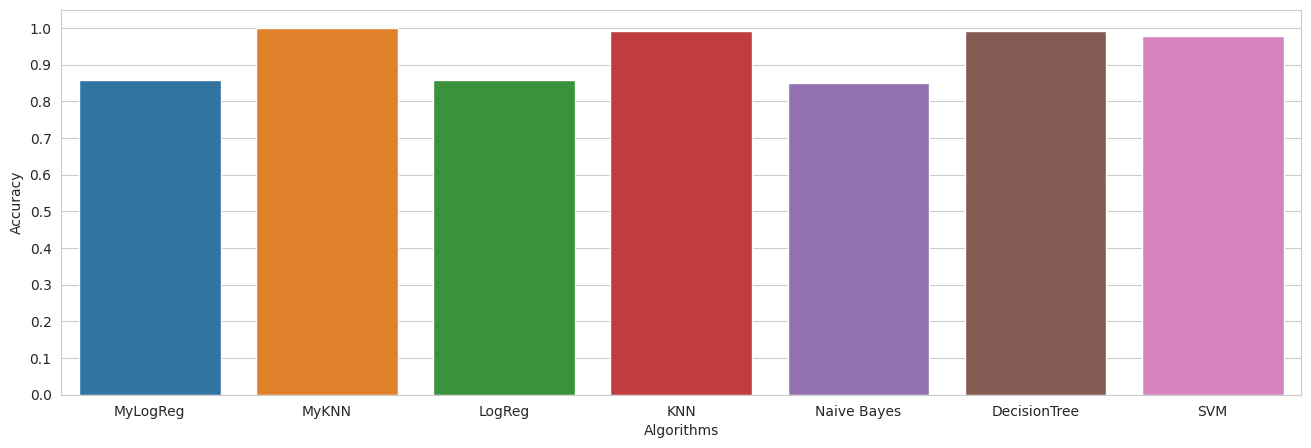

In [65]:
# colors = ["purple", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.show()

## Confusion Matrix

In [66]:
y_head_lr = log_reg.predict(X_test_scaled)
y_head_knn = knn.predict(X_test_scaled)
y_head_svm = svm.predict(X_test_scaled)
y_head_nb = nb.predict(X_test_scaled)
y_head_decision_tree = decision_tree.predict(X_test_scaled)
y_head_mylr = my_log_reg.predict(X_test_scaled)
y_head_myknn = my_knn.predict(X_test_scaled)

In [67]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_decision_tree = confusion_matrix(y_test, y_head_decision_tree)
cm_mylr = confusion_matrix(y_test, y_head_mylr)
cm_myknn = confusion_matrix(y_test, y_head_myknn)

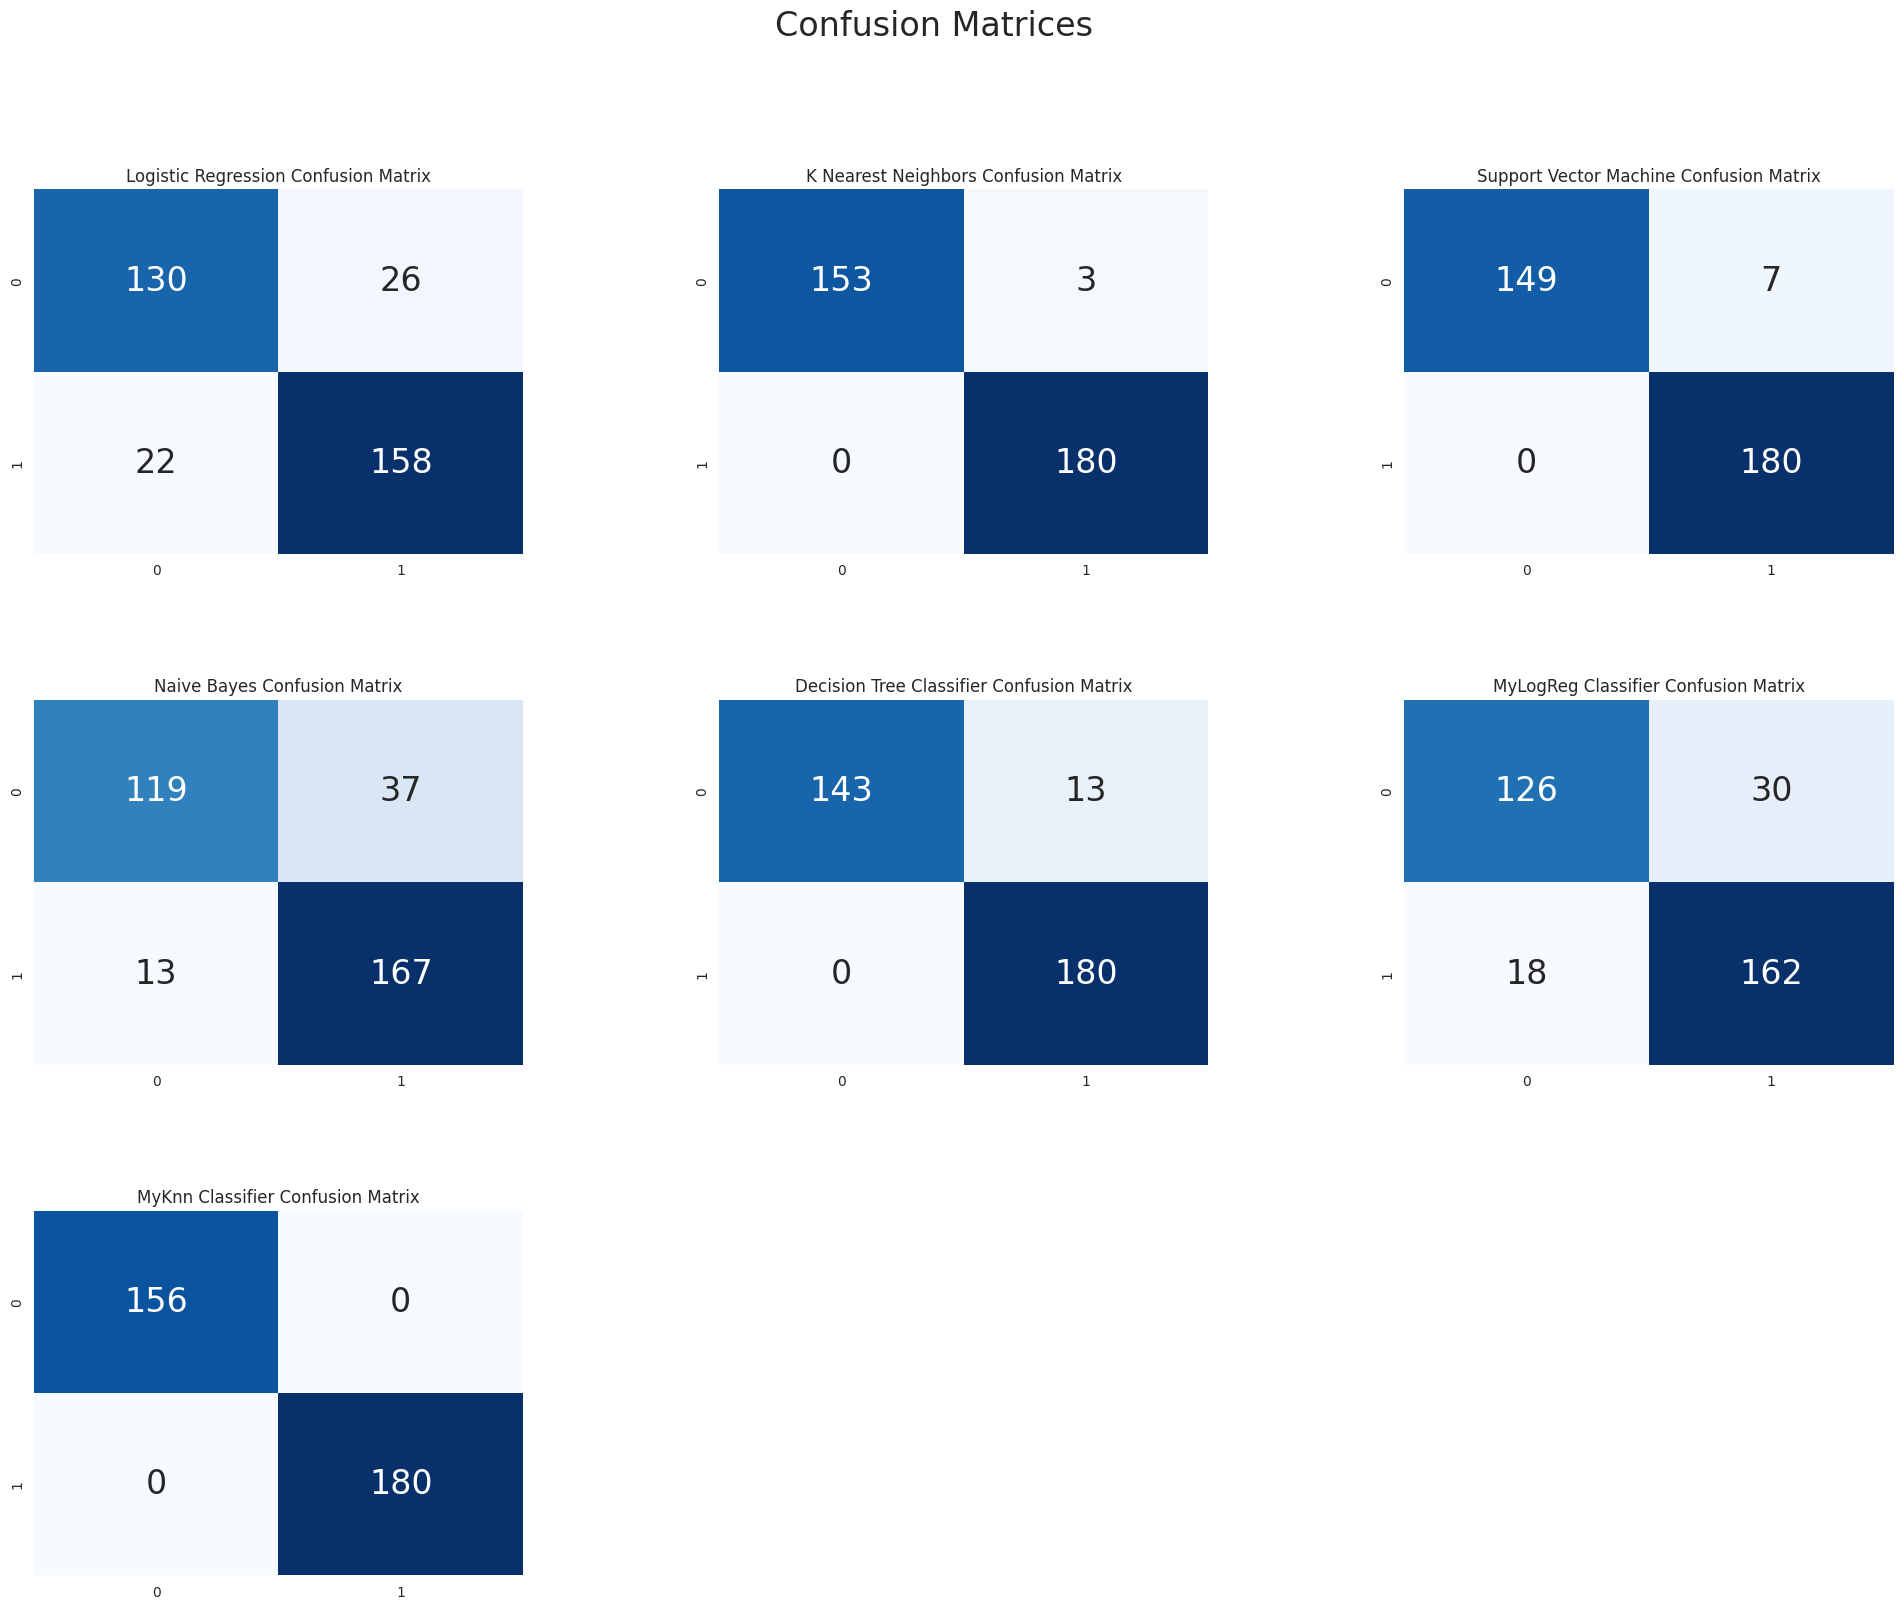

In [68]:
plt.figure(figsize=(24, 18))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_decision_tree,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("MyLogReg Classifier Confusion Matrix")
sns.heatmap(cm_mylr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("MyKnn Classifier Confusion Matrix")
sns.heatmap(cm_myknn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

## Выводы

Как видно по графикам выше, наши реализации не уступают по качеству вариантам из sklearn на выбранных данных.

Заметно лучше других работают алгоритмы KNN, SVM и Decision Tree, давая почти 100% точности.